## Project Title:- Earthquake damage prediction

## Team Id:- PTID-CDS-FEB-23-1473

## Introduction:

 When a earthquake occurs a lot of damage happens to the buildings in that area. in this project by using the details of buildings, there sturctures and legal ownership we are trying to predict the damage that has happen to the buildings. we have classified the damage into three types in that "1" represent low damage, "2" represent a meduim amount of damage, "3" represent almost complete destraction.  

## Problem statement

* Task1:- To prepare a complete data analysis report on the given data.
* Task2:- To create a model which prdict the damage of the buildings and here the damages are classified into three types, the     model has to predict that buildings false in which damage grade.
* Task3:- To Suggestions to the Seismologists to avoid earthquake event leading to
  significant damage in many buildings.


## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
df1=pd.read_csv('train_values.csv') # loading dataframe of input variables
df2=pd.read_csv('train_labels.csv').drop('building_id',axis=1) # loading dataframe of output variable and dropping building_id
data=pd.concat([df1,df2],axis=1)

In [3]:
pd.set_option('display.max_columns',None) # to display all the columns of dataset

In [4]:
data

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2


## Domain analysis

* **geo_level_1_id, geo_level_2_id, geo_level_3_id** : geographic
  region in which building exists, from largest (level 1) to most specific sub-region
  (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.
* **count_floors_pre_eq** : It is the number of floors in the building before the earthquake.
* **age** : The age of the building in the years.
* **area_percentage** : It is the area of footprint of building which is normalized.
* **height_percentage** : It is the height of building footprint which is normalized.
* **land_surface_condition** : It is the surface condition of the land where the building was built. Possible values: n, o, t.
* **foundation_type** : The type of foundation used while building was contructed. Possible values: h, i, r, u, w.
* **roof_type** : The type of roof used in the building. Possible values: n, q, x.
* **ground_floor_type** : The type of the ground floor present in the building. Possible values: f, m, v, x, z.
* **other_floor_type** : The type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.
* **position** : It is the position of the building. Possible values: j, o, s, t.
* **plan_configuration** : The building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.
* **has_superstructure_adobe_mud** : This column indicates if the superstructure was made of Adobe/Mud.
* **has_superstructure_mud_mortar_stone** : This column indicates if the superstructure was made of Mud Mortar - Stone.
* **has_superstructure_stone_flag** : This column indicates if the superstructure was made of Stone.
* **has_superstructure_cement_mortar_stone** : This column indicates if the superstructure was made of Cement Mortar - Stone.
* **has_superstructure_mud_mortar_brick** : This column indicates if the superstructure was made of Mud Mortar - Brick.
* **has_superstructure_cement_mortar_brick** : This column indicates if the superstructure was made of Cement Mortar - Brick.
* **has_superstructure_timber** : This column indicates if the superstructure was made of Timber.
* **has_superstructure_bamboo** : This column indicates if the superstructure was made of Bamboo.
* **has_superstructure_rc_non_engineered** : This column indicates if the superstructure was made of non-engineered reinforced concrete.
* **has_superstructure_rc_engineered** : This column
  indicates if the superstructure was made of engineered reinforced concrete.
* **has_superstructure_other** : This column indicates if the
  superstructure was made of any other material.
* **legal_ownership_status** : legal ownership status of the
  land where building was built. Possible values: a, r, v, w.
* **count_families**: The number of families that live in the building.
* **has_secondary_use** : This column indicates if the building was used for any secondary purpose.
* **has_secondary_use_agriculture** : This column indicates
  if the building was used for agricultural purposes.
* **has_secondary_use_hotel** : This column indicates if the
  building was used as a hotel.
* **has_secondary_use_rental** : This column indicates if the
  building was used for rental purposes.
* **has_secondary_use_institution** : This column indicates if
  the building was used as a location of any institution.
* **has_secondary_use_school** : This column indicates if
  the building was used as a school.
* **has_secondary_use_industry** : This column indicates if
  the building was used for industrial purposes.
* **has_secondary_use_health_post** : This column indicates
  if the building was used as a health post.
* **has_secondary_use_gov_office** : This column indicates
  if the building was used fas a government office.
* **has_secondary_use_use_police** : This column indicates if the building was used as a police station.
* **has_secondary_use_other** : This column indicates if the
  building was secondarily used for other purposes.

## Basic checks

In [5]:
data.head()  # checking the top five rows of data

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


In [6]:
data.tail()  # checking the bottom five rows of data

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
260596,688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
260600,747594,21,9,9101,3,10,7,6,n,r,n,f,q,j,d,0,1,0,0,0,0,0,0,0,0,0,v,3,0,0,0,0,0,0,0,0,0,0,0,3


In [7]:
data.info() # to see basic information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [8]:
data.describe() # to see descriptive statistics of numerical columns

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,0.983949,0.111880,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,0.418389,0.315219,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
data.describe(include='O') # to see the statistics of columns which are objec datatype

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
count,260601,260601,260601,260601,260601,260601,260601,260601
unique,3,5,3,5,4,4,10,4
top,t,r,n,f,q,s,d,v
freq,216757,219196,182842,209619,165282,202090,250072,250939


## EDA

## Univariate analysis

In [10]:
dt=data.drop('building_id',axis=1)

In [11]:
import sweetviz as sv
report=sv.analyze(dt)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### oberservations

* geo_level_1_id :- In this column the data is positively skewed and the maximum data is between 5 to 10.
* count_floors_pre_eq :- The maximum number of building that is 60% of buildings has floor count of 2 and only less than 1% buildings has the count floor 5 or more than that.
* Age :- the age of the buildings are highly skewed as range of age is very large, it is from 0 to 1000.
* Area_percentage :- this column is positively skewed and the maximum data is between 1 to 20
* height_percentage :- This column is also positively skewed and the maximum data is between 2 to 10.
* land_surface_condition :- The maximum buildings land surface is 't',that is 83% ,'n' is 14% 'and o' is 3% which is least.
* foundation_type :- The foundation of maximum buildings that is 84% is 'r' and less then 1% of buildings has foundation type 'h'.
* roof_type :- The roof type of maximum buildings is 'n' that is 70% and 24% of buildings has the roof type of 'q' and only 6% of buildings has roof type of 'x'.
* ground_floor_type :- The ground floor type of maximum buildings that is 80% is 'f',and least that is less than 1% buildings has the ground floor type of 'z' and 'm'.
* other_floor_type :- The maximum buildings that is 63% has the other floor type of 'q',and only 5% of buildings has the other floor type of 's'.
* position :- The 78% of buildings has the position type of 's' which is maximum and only less than 1% buildings has the position type of 'o'.
* plan_configuration :- The plan configuration of 96% buildings is 'd' type and all other types of plan configuration are only 1% or less than 1%.
* has_superstructure_adobe_mud : The 9% of buildings that is 23,101 are build using the adobe or mud and In construction of 91% buildings adobe or mud is not used.
* has_superstructure_stone_flag :- In 3% buildings that is 8,947 ,the stone is used in construction of this buildings.
* has_superstructure_mud_mortar_stone :- The 76% that is 1,98,561 buildings are construction using mud morter stone and In construction of 24% buildings mud mortar stone is not used.
* has_superstructure_cement_mortar_stone :- In 2% buildings that is 4,752 , cement mortar stone is used construction of this buildings.
* has_superstructure_mud_mortar_brick :- The mud mortar brick is used in construction of 17,761 that is 7% buildings ,and in 93% buildings it is not used.
* has_superstructure_cement_mortar_brick :- The cement mortar brick is used in construction of 8% that is 19,615 buildings and in 92% buildings this brick is not used.
* has_superstructure_timber :- In construction of 25% that is 66,450 buildings the timber is used and in 75% buildings the timber is not used.
* has_superstructure_bamboo :- In construction of 9% that is 22,154 buildings the bamboo is used and in 91% buildings the bamboo is not used.
* has_superstructure_rc_non_engineered :- The 11,099 that is 4% buildings are constructed using  non engineered reinforced concrete.
* has_superstructure_rc_engineered :- The 4,133 that is 2% buildings are constructed using engineered reinforced concrete.
* has_superstructure_other :- In construction of 3,905 that is 1% buildings other material  than above is used.
* legal_ownership_status :- the legal ownership of 96% buildings is 'v' type, 2% is 'a' type and 1% and less than 1%  is 'w' and 'r' respectively.
* count_families:- In the maximum buildings that is 87%  the count of families living in it is 1 and in less than 1% of buildings the count of families living in that building is more than 4.
* has_secondary_use :- In the above data 11% that is 29,156 buildings are used for any secondary purpose.
* has_secondary_use_agriculture :- In the above data 16,777 buildings are used for the agriculture purposes.
* has_secondary_use_hotel :- In the above data 3% that is 8763 buildings are used as the hotels.
* has_secondary_use_rental :- The 2,111 buildings in the above data were used for the retal purpose.
* has_secondary_use_institution :- only 245 buildings in the above data were used as institutions.
* has_secondary_use_school :- There are 94 buildings in the above data which is used for schools.
* has_secondary_use_industry :- In the above data 279 buildings were used for industrial purposes.
* has_secondary_use_health_post :- The 49 buildings in the above data were used as the health post.
* has_secondary_use_gov_office :- The 39 buildings in the above data were used as the goverenment offices.
* has_secondary_use_use_police :- The 23 buildings in the above data were used as the police stations
* has_secondary_use_other :- The 1334 buildings in the above data were used for any secondary purposes other than above mentioned.

## Bivariate analysis

In [1]:
dt1=data[['geo_level_1_id','geo_level_2_id','geo_level_3_id','age','area_percentage','height_percentage']]

NameError: name 'data' is not defined

In [13]:
dt1

,geo_level_1_id,geo_level_2_id,geo_level_3_id,age,area_percentage,height_percentage
0,6,487,12198,30,6,5
1,8,900,2812,10,8,7
2,21,363,8973,10,5,5
3,22,418,10694,10,6,5
4,11,131,1488,30,8,9
...,...,...,...,...,...,...
260596,25,1335,1621,55,6,3
260597,17,715,2060,0,6,5
260598,17,51,8163,55,6,7
260599,26,39,1851,10,14,6


In [14]:
dt2=data.drop(['building_id','geo_level_1_id','geo_level_2_id','geo_level_3_id','age','area_percentage','height_percentage'],axis=1)

In [15]:
dt2

,count_floors_pre_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,2,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,2,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,2,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,2,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,3,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,1,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
260597,2,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260598,3,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260599,2,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2


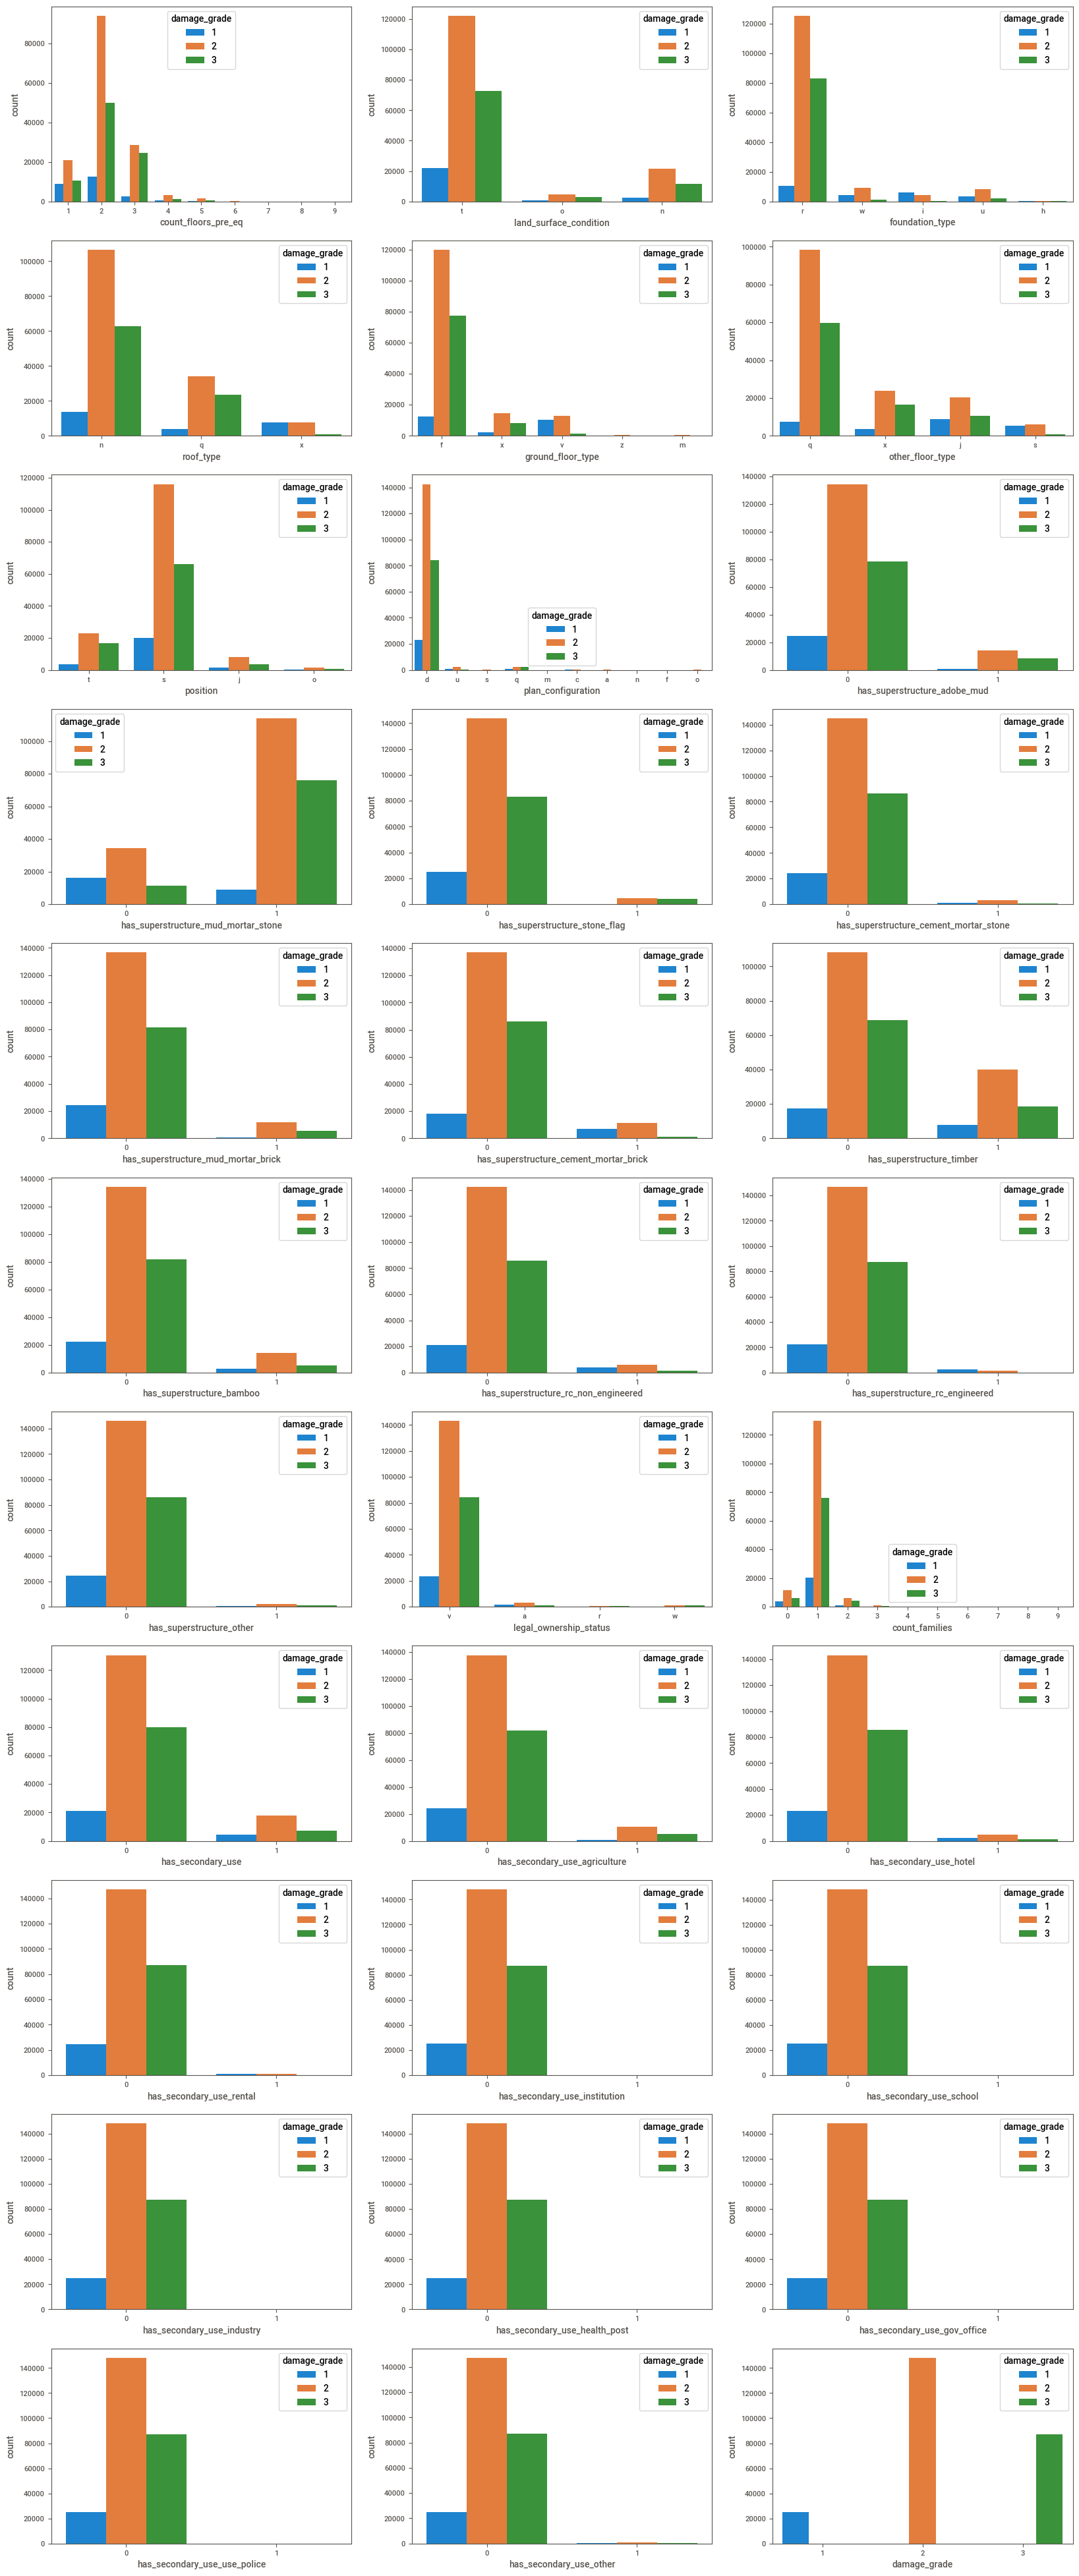

In [16]:
plt.figure(figsize=(20,50))
plotnumber=1
for i in dt2:
    plt.subplot(11,3,plotnumber)
    sns.countplot(data=dt2,x=i,hue='damage_grade')
    plotnumber+=1
    

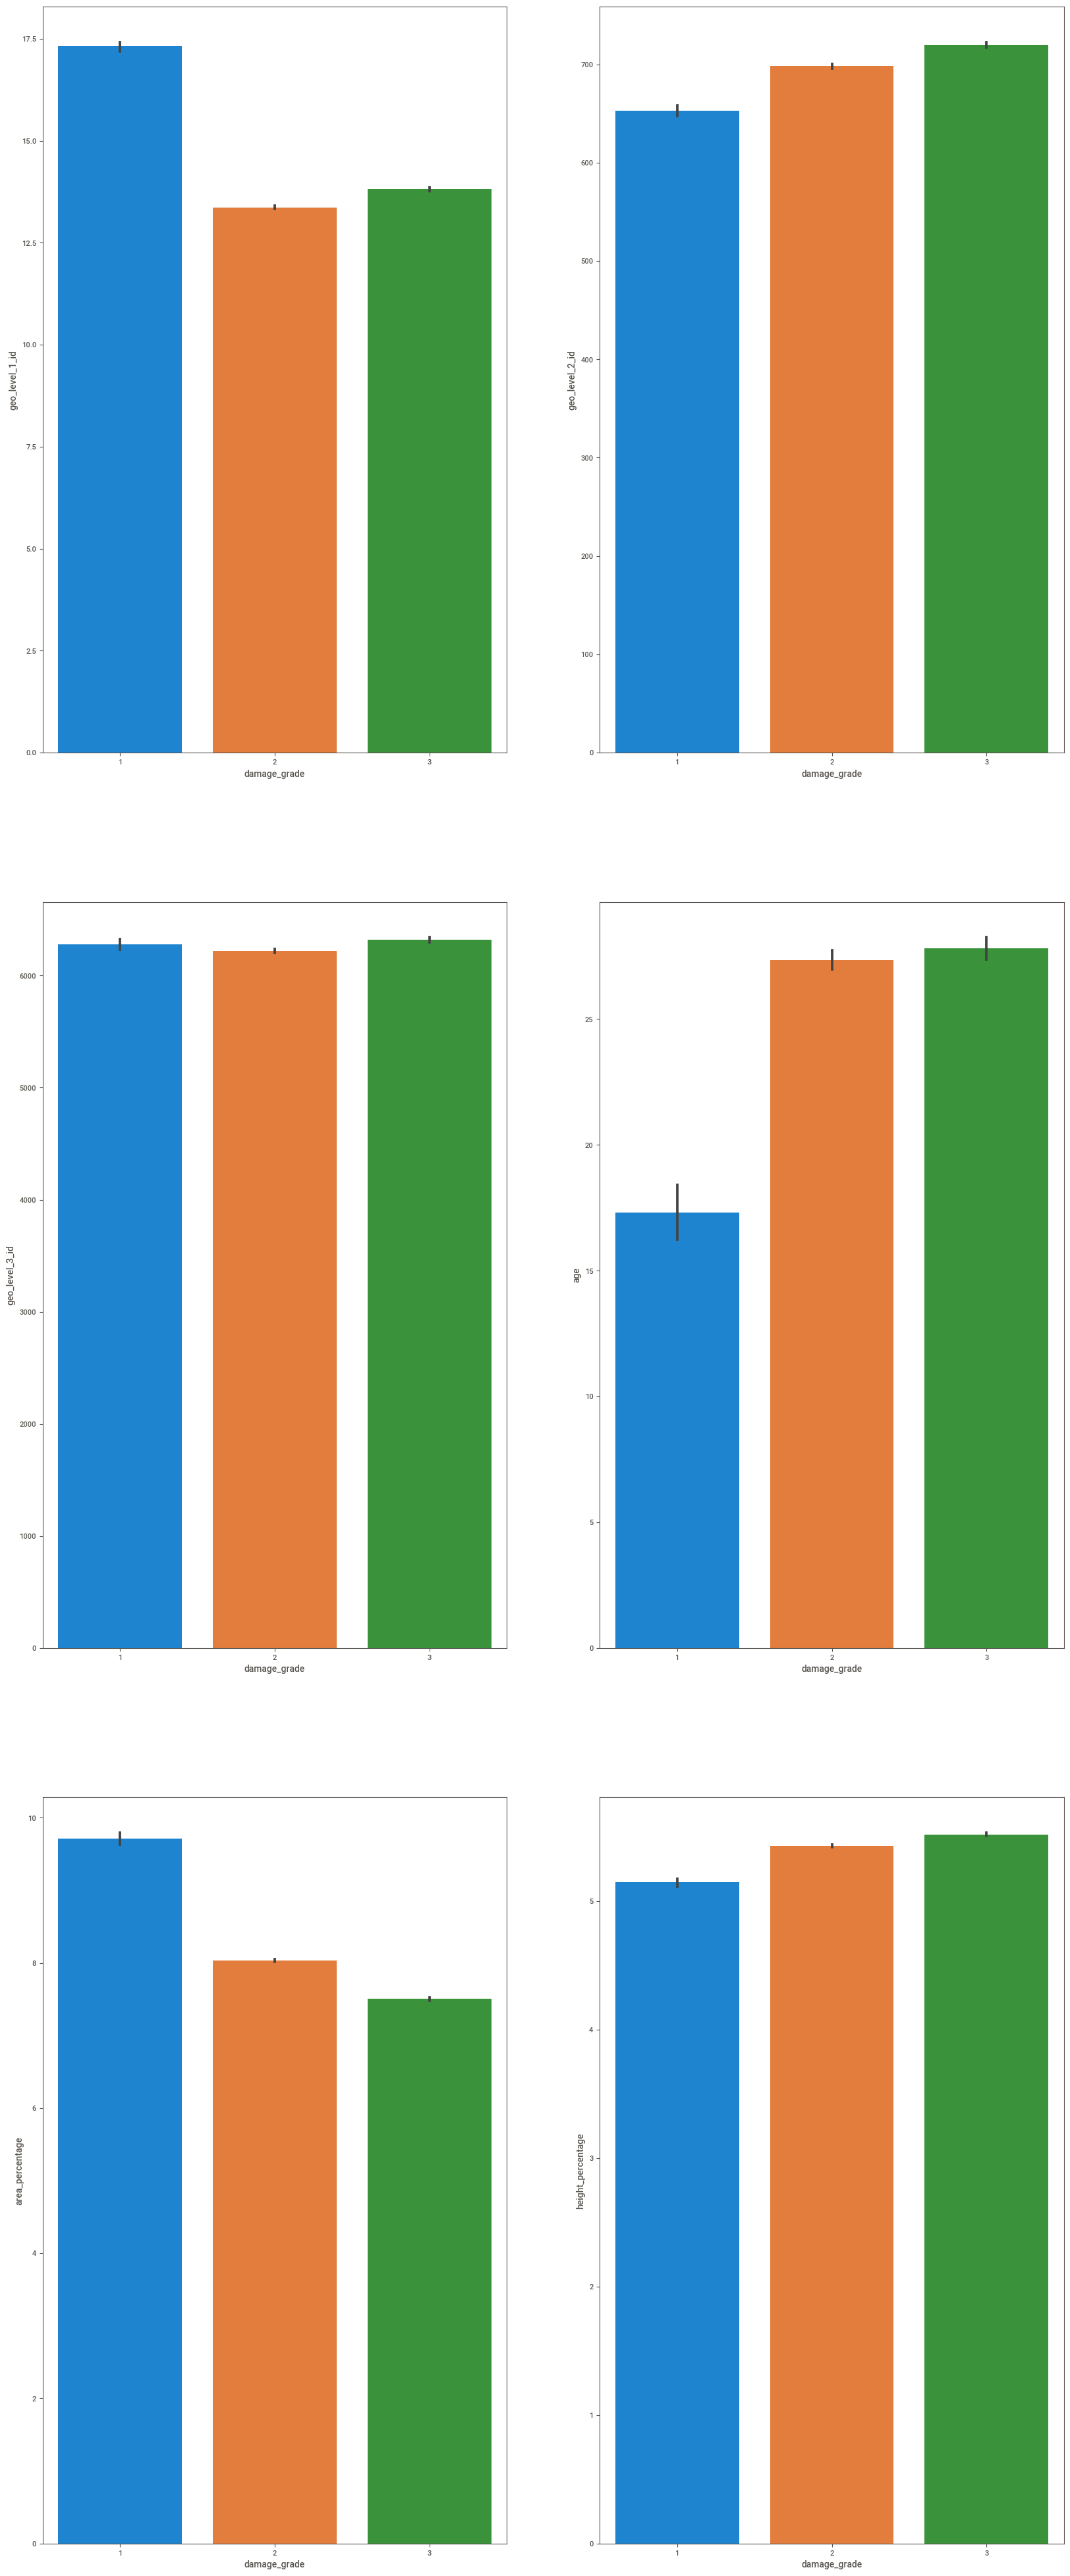

In [17]:
plt.figure(figsize=(20,50))
plotnumber=1
for i in dt1:
    plt.subplot(3,2,plotnumber)
    sns.barplot(data=dt1,x=data.damage_grade,y=i)
    plotnumber+=1

## Data Preproccesing

In [18]:
data.isnull().sum() #checking the null values

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [19]:
data.loc[data.duplicated()] # checking the duplicate values

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade


In [20]:
# checking the outliers

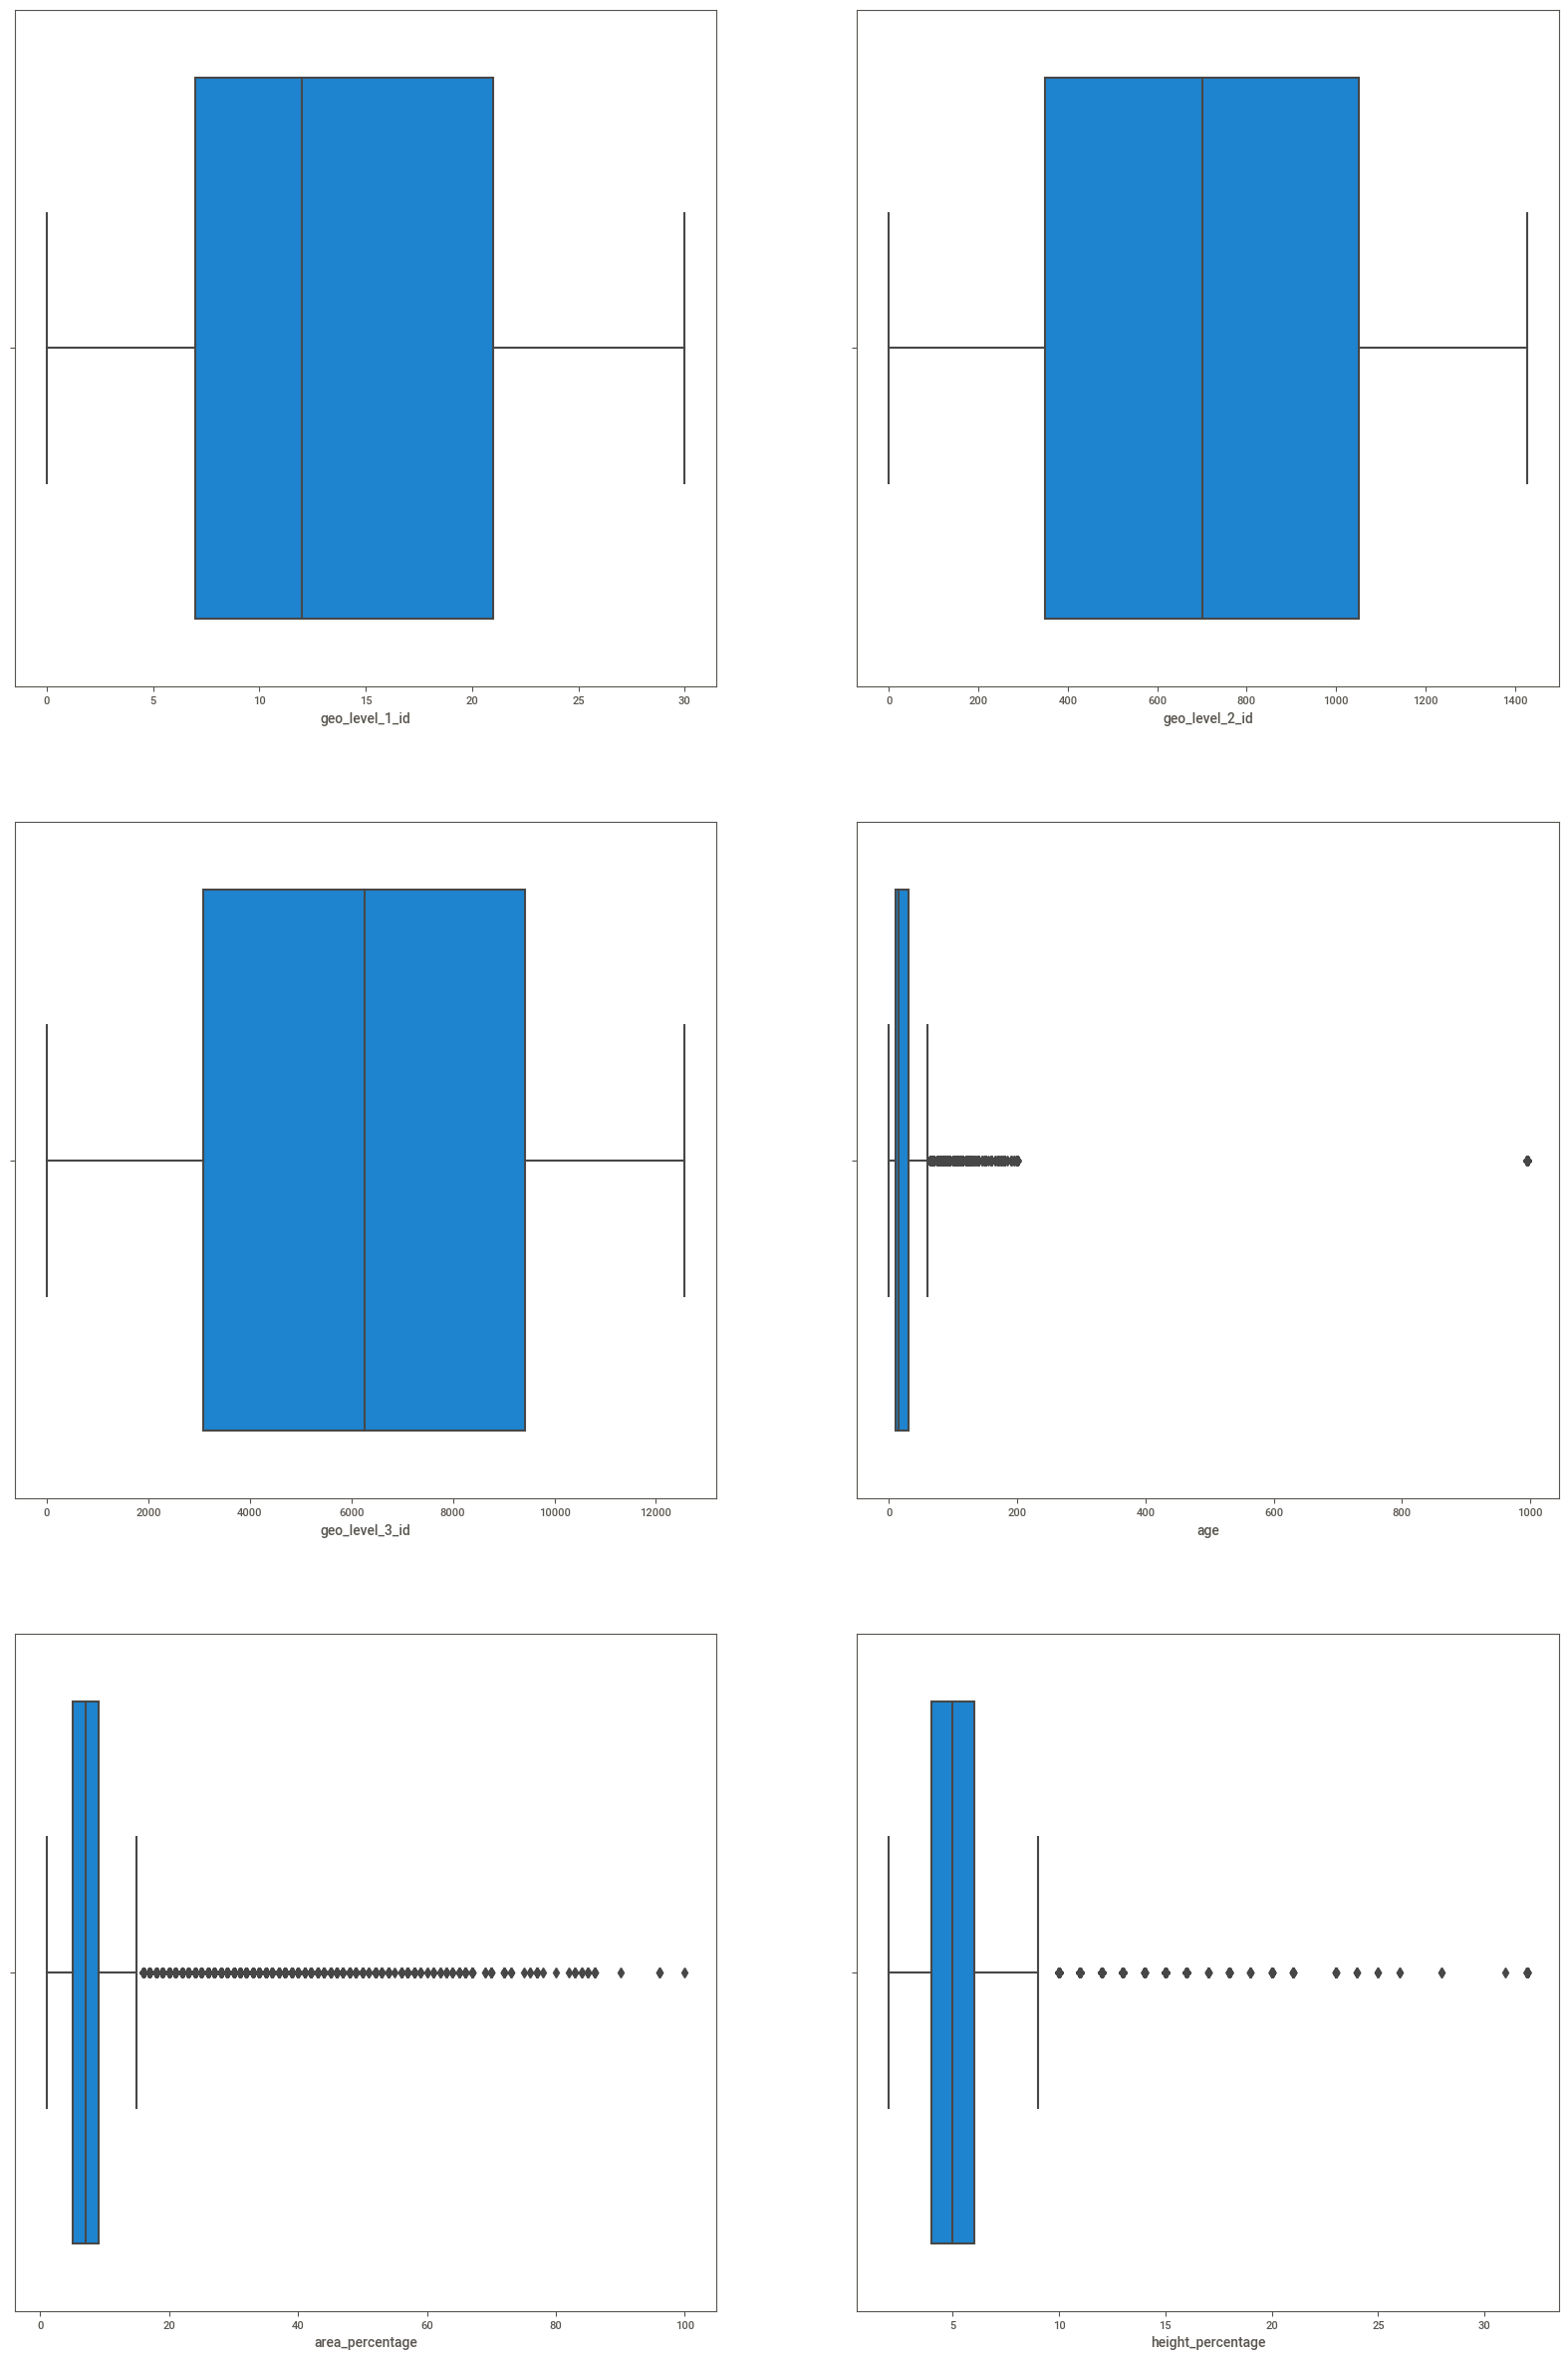

In [21]:
plt.figure(figsize=(20,30))
plotnumber=1
for i in dt1:
    plt.subplot(3,2,plotnumber)
    sns.boxplot(data=dt1,x=i)
    plotnumber+=1

In [22]:
data.drop(data[data.age>950].index,inplace=True) 
# age in 1360 rows 995 which is a corrupted values so we are dropping it, and it is also a extreme outlier.

<AxesSubplot:xlabel='age'>

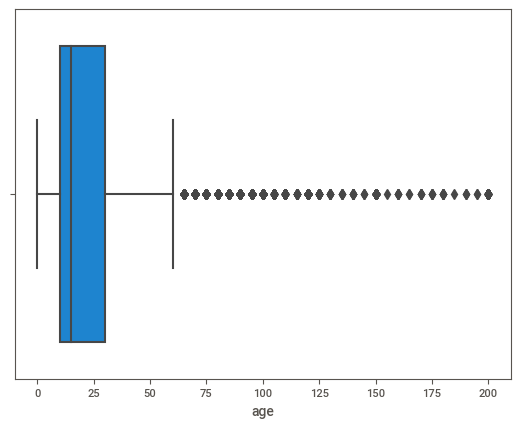

In [23]:
sns.boxplot(data=data,x='age')

* Note: All other outliers are continious so we are not removing other outliers

In [24]:
# checking the missing value in categorical data

In [25]:
data.land_surface_condition.value_counts()

t    215522
n     35389
o      8300
Name: land_surface_condition, dtype: int64

In [26]:
data.foundation_type.value_counts()

r    217932
w     15108
u     14165
i     10558
h      1448
Name: foundation_type, dtype: int64

In [27]:
data.roof_type.value_counts()

n    181762
q     61333
x     16116
Name: roof_type, dtype: int64

In [28]:
data.ground_floor_type.value_counts()

f    208421
x     24809
v     24476
z       998
m       507
Name: ground_floor_type, dtype: int64

In [29]:
data.other_floor_type.value_counts()

q    164311
x     43242
j     39681
s     11977
Name: other_floor_type, dtype: int64

In [30]:
data.position.value_counts()

s    201059
t     42681
j     13186
o      2285
Name: position, dtype: int64

In [31]:
data.plan_configuration.value_counts()

d    248746
q      5656
u      3632
s       344
c       323
a       247
o       159
m        44
n        38
f        22
Name: plan_configuration, dtype: int64

In [32]:
data.legal_ownership_status.value_counts()

v    249591
a      5489
w      2664
r      1467
Name: legal_ownership_status, dtype: int64

### Converting the categorical data

In [33]:
data.land_surface_condition=data.land_surface_condition.replace({'t':2,'n':1,'o':0}) #converting land_surface condition through manual encoding

In [34]:
data.foundation_type=data.foundation_type.replace({'r':4,'w':3,'u':2,'i':1,'h':0}) #converting foundation type through manual encoding

In [35]:
data.roof_type=data.roof_type.replace({'n':2,'q':1,'x':0}) #converting roof type through manual encoding

In [36]:
data.ground_floor_type=data.ground_floor_type.replace({'f':4,'x':3,'v':2,'z':1,'m':0}) #converting ground floor type through manual encoding

In [37]:
data.other_floor_type=data.other_floor_type.replace({'q':3,'x':2,'j':1,'s':0})#converting other floor type through manual  encoding

In [38]:
data.position=data.position.replace({'s':3,'t':2,'j':1,'o':0}) #converting position through manual encoding

In [39]:
data.plan_configuration=data.plan_configuration.replace({'d':9,'q':8,'u':7,'s':6,'c':5,'a':4,'o':3,'m':2,'n':1,'f':0}) #converting plan_configuration through manual encoding

In [40]:
data.legal_ownership_status=data.legal_ownership_status.replace({'v':3,'a':2,'w':1,'r':0}) #converting legal_ownership_status through manual encoding

In [41]:
data.damage_grade=data.damage_grade.replace({1:0,2:1,3:2}) 

In [42]:
data

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,2,4,2,4,3,2,9,1,1,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,2
1,28830,8,900,2812,2,10,8,7,0,4,2,3,3,3,9,0,1,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,1
2,94947,21,363,8973,2,10,5,5,2,4,2,4,2,2,9,0,1,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,2
3,590882,22,418,10694,2,10,6,5,2,4,2,4,2,3,9,0,1,0,0,0,0,1,1,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,1
4,201944,11,131,1488,3,30,8,9,2,4,2,4,2,3,9,1,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,1,4,2,4,1,3,8,0,1,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,1
260597,669485,17,715,2060,2,0,6,5,2,4,2,4,3,3,9,0,1,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,2
260598,602512,17,51,8163,3,55,6,7,2,4,1,4,3,3,9,0,1,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,2
260599,151409,26,39,1851,2,10,14,6,2,4,0,2,0,1,9,0,0,0,0,0,1,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,1


## feature selection

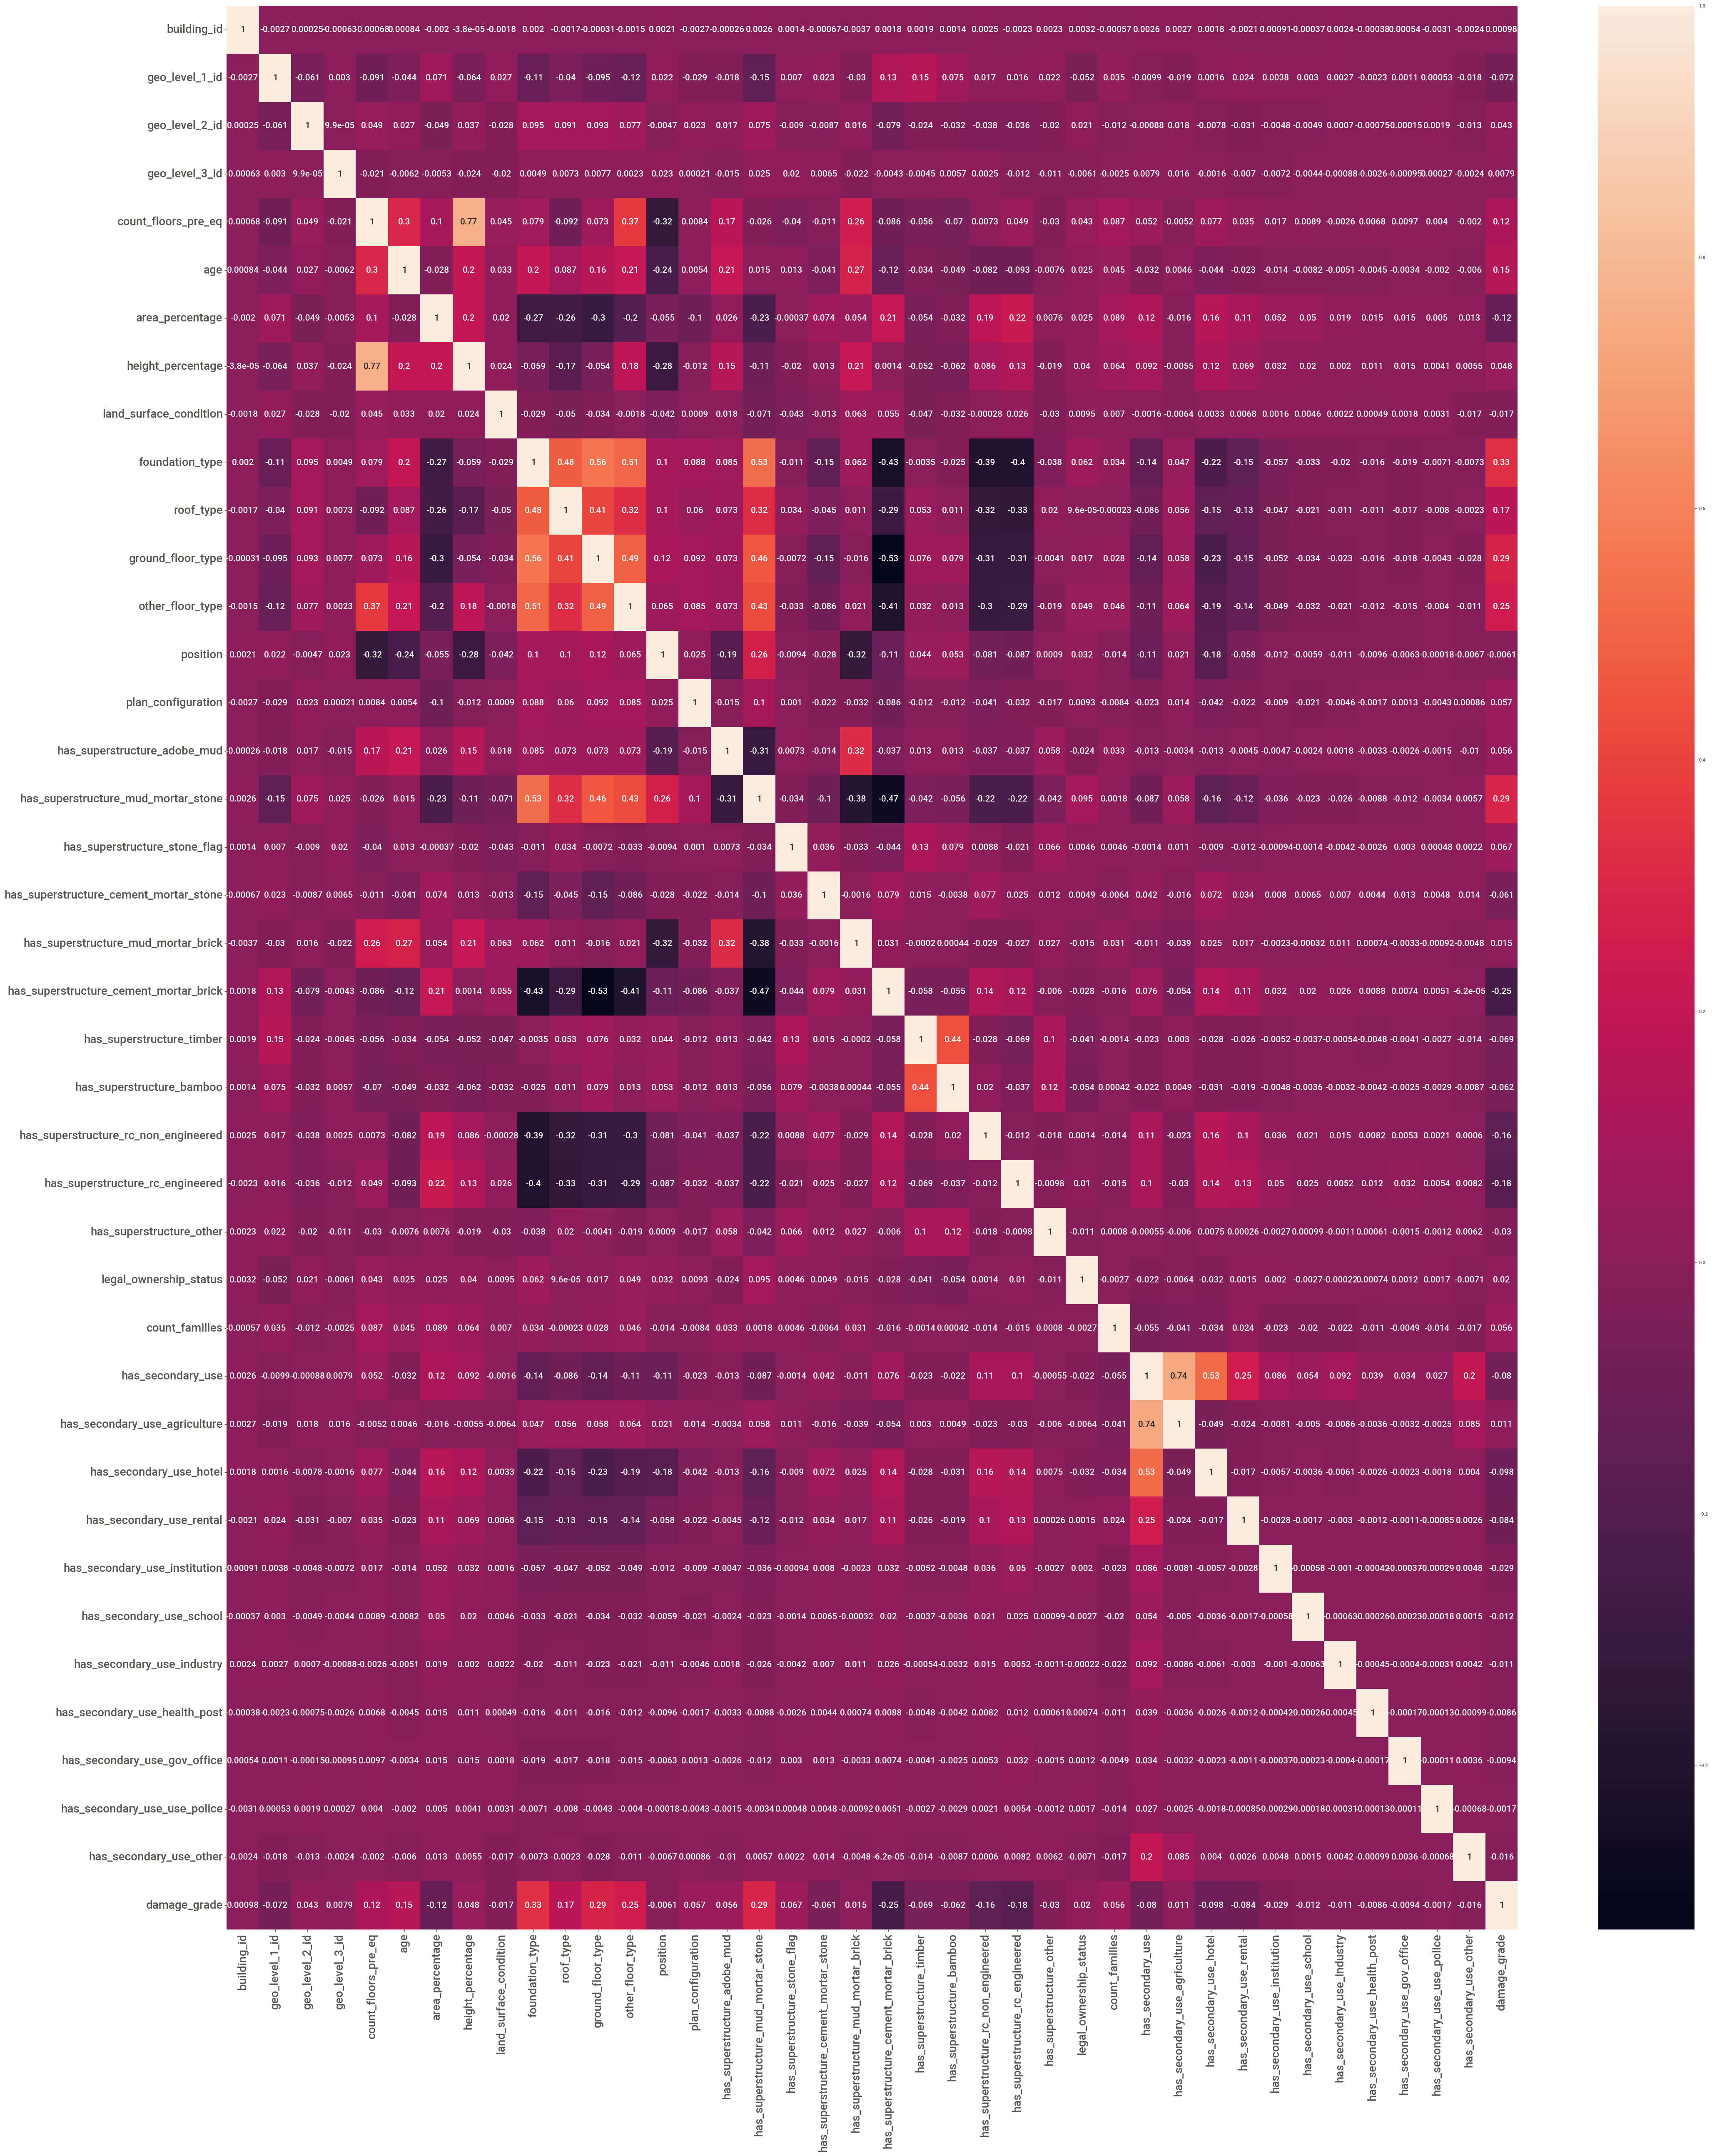

In [43]:
plt.figure(figsize=(50,60))
sns.heatmap(data.corr(),annot=True,annot_kws={'fontsize':15})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

* Note: As the correlation between any columns is not more than 0.95 so we are not removing any column.

In [44]:
data.drop('building_id',axis=1,inplace=True) # as the building id is not necessary because it has all the unique values so we are dropping it.

### Splitting data into input and output variables

In [45]:
x=data.drop('damage_grade',axis=1)
x

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,6,487,12198,2,30,6,5,2,4,2,4,3,2,9,1,1,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0
1,8,900,2812,2,10,8,7,0,4,2,3,3,3,9,0,1,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0
2,21,363,8973,2,10,5,5,2,4,2,4,2,2,9,0,1,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0
3,22,418,10694,2,10,6,5,2,4,2,4,2,3,9,0,1,0,0,0,0,1,1,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0
4,11,131,1488,3,30,8,9,2,4,2,4,2,3,9,1,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,25,1335,1621,1,55,6,3,1,4,2,4,1,3,8,0,1,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0
260597,17,715,2060,2,0,6,5,2,4,2,4,3,3,9,0,1,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0
260598,17,51,8163,3,55,6,7,2,4,1,4,3,3,9,0,1,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0
260599,26,39,1851,2,10,14,6,2,4,0,2,0,1,9,0,0,0,0,0,1,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0


In [46]:
y=data.damage_grade

In [47]:
y

0         2
1         1
2         2
3         1
4         2
         ..
260596    1
260597    2
260598    2
260599    1
260600    2
Name: damage_grade, Length: 259211, dtype: int64

## Scaling the data

In [48]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [49]:
x=scale.fit_transform(x)

In [50]:
x

array([[0.2       , 0.3412754 , 0.97063738, ..., 0.        , 0.        ,
        0.        ],
       [0.26666667, 0.63069376, 0.22376064, ..., 0.        , 0.        ,
        0.        ],
       [0.7       , 0.25437982, 0.71401289, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.56666667, 0.03573931, 0.64955837, ..., 0.        , 0.        ,
        0.        ],
       [0.86666667, 0.02733006, 0.14729052, ..., 0.        , 0.        ,
        0.        ],
       [0.7       , 0.00630694, 0.7241983 , ..., 0.        , 0.        ,
        0.        ]])

### splitting the training and testing data

In [51]:
from sklearn.model_selection import train_test_split as tts

In [52]:
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.20,random_state=21)

## Logistic regression

In [53]:
# model creation

In [54]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [55]:
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [56]:
#model evaluation

In [57]:
from sklearn.metrics import classification_report,accuracy_score,f1_score

In [58]:
print(classification_report(ytest,ypred))
print(f'Accuracy_score = {accuracy_score(ytest,ypred)}')
print('f1_score = ',f1_score(ytest,ypred,average='weighted'))


              precision    recall  f1-score   support

           0       0.57      0.32      0.41      5007
           1       0.59      0.90      0.71     29535
           2       0.54      0.13      0.21     17301

    accuracy                           0.59     51843
   macro avg       0.57      0.45      0.45     51843
weighted avg       0.57      0.59      0.52     51843

Accuracy_score = 0.5867908878730012
f1_score =  0.5173880063351917


## KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
# finding the error rate for different K-Values
error_rate = []
for i in range(1,7):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    pred_i = knn.predict(xtest)
    error_rate.append(np.mean(pred_i != ypred))

In [61]:
# error_rate

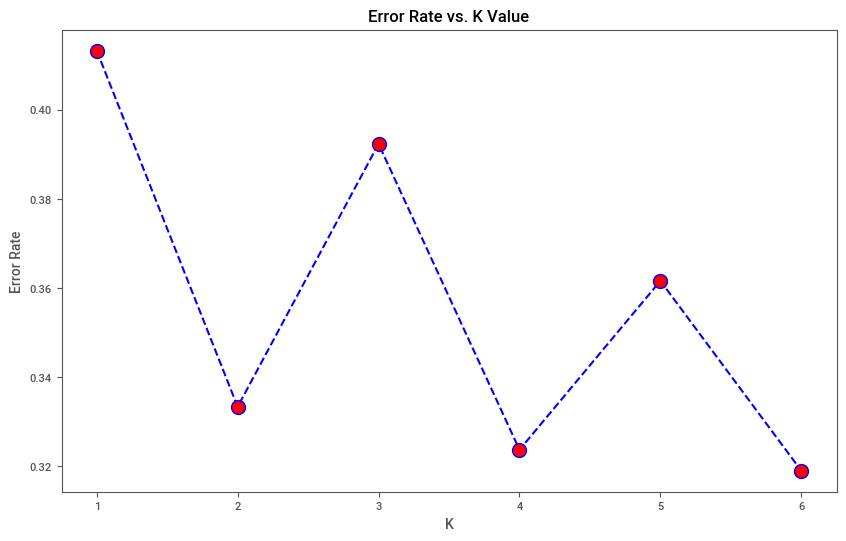

In [62]:
# plotting a graph to see which which K-Value has a minimum error rate
plt.figure(figsize=(10,6))
plt.plot(range(1,7),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [63]:
# model creation
knn1=KNeighborsClassifier(n_neighbors=7)
knn1.fit(xtrain,ytrain)
ypred=knn1.predict(xtest)

In [64]:
# model evaluation
print('classification report:')
print(classification_report(ytest,ypred))
print(f'accuracy_score = {accuracy_score(ytest,ypred)}')
print('f1_score = ',f1_score(ytest,ypred,average='weighted'))


classification report:
              precision    recall  f1-score   support

           0       0.56      0.47      0.51      5007
           1       0.70      0.77      0.73     29535
           2       0.64      0.56      0.60     17301

    accuracy                           0.67     51843
   macro avg       0.63      0.60      0.61     51843
weighted avg       0.67      0.67      0.67     51843

accuracy_score = 0.6712188723646394
f1_score =  0.6664211335471316


## Decision Tree

In [65]:
# model creation
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [66]:
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

In [67]:
# model evaluation
print('classification report:')
print(classification_report(ytest,ypred))
print(f'accuracy_score = {accuracy_score(ytest,ypred)}')
print('f1_score = ',f1_score(ytest,ypred,average='weighted'))

classification report:
              precision    recall  f1-score   support

           0       0.49      0.51      0.50      5007
           1       0.71      0.70      0.71     29535
           2       0.61      0.62      0.62     17301

    accuracy                           0.66     51843
   macro avg       0.61      0.61      0.61     51843
weighted avg       0.66      0.66      0.66     51843

accuracy_score = 0.6576201222923056
f1_score =  0.658159466358207


## Random farest

In [68]:
# model creation
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [69]:
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)

In [70]:
# model evaluation
print('classification report:')
print(classification_report(ytest,ypred))
print(f'accuracy_score = {accuracy_score(ytest,ypred)}')
print('f1_score = ',f1_score(ytest,ypred,average='weighted'))

classification report:
              precision    recall  f1-score   support

           0       0.67      0.48      0.56      5007
           1       0.73      0.83      0.77     29535
           2       0.72      0.61      0.66     17301

    accuracy                           0.72     51843
   macro avg       0.71      0.64      0.66     51843
weighted avg       0.72      0.72      0.72     51843

accuracy_score = 0.7219875393013522
f1_score =  0.7162392450872397


## XGBoosting

In [71]:
# model creation
from xgboost import XGBClassifier
xg=XGBClassifier()

In [72]:
xg.fit(xtrain,ytrain)
ypred=xg.predict(xtest)

In [73]:
# model evaluation
print('classification report:')
print(classification_report(ytest,ypred))
print(f'accuracy_score = {accuracy_score(ytest,ypred)}')
print('f1_score = ',f1_score(ytest,ypred,average='weighted'))

classification report:
              precision    recall  f1-score   support

           0       0.68      0.45      0.54      5007
           1       0.72      0.85      0.78     29535
           2       0.75      0.59      0.66     17301

    accuracy                           0.73     51843
   macro avg       0.72      0.63      0.66     51843
weighted avg       0.73      0.73      0.72     51843

accuracy_score = 0.7265011669849353
f1_score =  0.7183910050567209


## Hyper parameter tunning

In [74]:
from sklearn.model_selection import RandomizedSearchCV

In [75]:
import sklearn
scorer = sklearn.metrics.make_scorer(sklearn.metrics.f1_score, average = 'weighted')

In [76]:
param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

In [77]:
XGB=XGBClassifier(random_state=42,verbosity=0,silent=0)
rcv= RandomizedSearchCV(estimator=XGB, scoring=scorer ,param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

In [79]:
rcv.fit(xtrain, ytrain)##training data on randomsearch cv
best_params=rcv.best_estimator_ # this will give the best estimators
print(best_params) # printing the best estimator

Fitting 3 folds for each of 100 candidates, totalling 300 fits
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.8, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=80, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)


In [80]:
# training the data using best parameters
xgb=best_params
xgb.fit(xtrain,ytrain)
ypred=xgb.predict(xtest)

In [81]:
# model evaluation
print('classification report:')
print(classification_report(ytest,ypred))
print(f'accuracy_score = {accuracy_score(ytest,ypred)}')
print('f1_score = ',f1_score(ytest,ypred,average='weighted'))

classification report:
              precision    recall  f1-score   support

           0       0.69      0.52      0.59      5007
           1       0.75      0.84      0.79     29535
           2       0.75      0.65      0.70     17301

    accuracy                           0.75     51843
   macro avg       0.73      0.67      0.69     51843
weighted avg       0.75      0.75      0.74     51843

accuracy_score = 0.7462531103524102
f1_score =  0.7415649744635949


## Model comparision report

 <img src="earth.png" width="">



## Conclusion:-

### Reports on challenges faced

* one of the first challenge faced by us is to analyze the columns of the dataset as there are many in columns in this dataset.
* it was very difficult write observations for graphs because there are many graphs in the dataset.
* And we didn't got the good accuracy in first algorithms but after that it was better but when we removed the balancing of dataset step then our result was increased and now after hyperparameter tunning result was better. 